In [385]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


In [386]:
vars = ["prim_Girls", "prim_Boys", "prim_Overall", "upPrim_Girls", "upPrim_Boys", "upPrim_Overall", "snr_Girls", "snr_Boys", "snr_Overall"]

cats = ["General", "SC", "ST", "OBC", "Overall"]

state = "Gujarat"

var = vars[8]
cat = cats[1]

In [387]:
df = pd.read_csv("Gujarat.csv")

In [388]:
df

,Location,Social Category,prim_Girls,prim_Boys,prim_Overall,upPrim_Girls,upPrim_Boys,upPrim_Overall,snr_Girls,snr_Boys,snr_Overall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.51,8.28
1,AHMEDABAD,OBC,0.00,0.00,0.00,7.17,4.03,5.49,17.23,20.13,18.96
2,AHMEDABAD,SC,0.00,0.00,0.00,0.00,0.00,0.00,9.89,14.03,12.21
3,AHMEDABAD,ST,0.00,0.00,0.00,17.65,15.37,16.39,29.30,25.31,27.06
4,AHMEDABAD,Overall,0.00,0.00,0.00,2.71,0.60,1.58,11.98,14.10,13.19
...,...,...,...,...,...,...,...,...,...,...,...
160,VALSAD,General,0.00,0.00,0.00,2.27,1.64,1.92,10.61,13.72,12.33
161,VALSAD,OBC,2.75,1.03,1.85,3.27,4.36,3.85,3.12,6.87,5.13
162,VALSAD,SC,10.80,11.36,11.10,22.43,17.45,19.80,16.08,26.68,21.75
163,VALSAD,ST,0.89,1.00,0.94,5.25,4.38,4.81,14.26,17.35,15.81


In [389]:
colName = var
locations = df['Location']
caste = df['Social Category']

In [390]:
locations

0      AHMEDABAD
1      AHMEDABAD
2      AHMEDABAD
3      AHMEDABAD
4      AHMEDABAD
         ...    
160       VALSAD
161       VALSAD
162       VALSAD
163       VALSAD
164       VALSAD
Name: Location, Length: 165, dtype: object

In [391]:
caste

0      General
1          OBC
2           SC
3           ST
4      Overall
        ...   
160    General
161        OBC
162         SC
163         ST
164    Overall
Name: Social Category, Length: 165, dtype: object

In [392]:
genData = df[df["Social Category"] == cat]

In [393]:
genData

,Location,Social Category,prim_Girls,prim_Boys,prim_Overall,upPrim_Girls,upPrim_Boys,upPrim_Overall,snr_Girls,snr_Boys,snr_Overall
2,AHMEDABAD,SC,0.00,0.00,0.00,0.00,0.00,0.00,9.89,14.03,12.21
7,AMRELI,SC,3.31,1.11,2.19,2.05,0.00,0.61,17.20,15.36,16.27
12,ANAND,SC,1.71,3.99,2.90,4.11,1.33,2.62,12.20,8.03,9.93
17,ARAVALLI,SC,0.00,0.10,0.00,1.94,2.32,2.14,3.75,10.63,7.35
22,BANAS KANTHA,SC,0.00,0.00,0.00,7.67,3.61,5.57,22.15,23.29,22.82
27,BHARUCH,SC,0.00,1.55,0.18,0.00,3.12,0.00,5.49,20.51,13.53
32,BHAVNAGAR,SC,8.04,9.22,8.66,14.91,13.16,14.00,28.74,29.16,28.97
37,BOTAD,SC,0.00,0.11,0.00,6.58,0.00,2.96,19.08,22.58,21.01
42,CHHOTAUDEPUR,SC,0.00,0.00,0.00,40.91,33.33,37.00,36.24,31.52,33.60
47,DEVBHOOMI DWARKA,SC,0.00,0.00,0.00,1.36,3.02,2.21,15.93,35.01,26.52


In [394]:
data = genData[["Location", var]]

In [395]:
df = pd.DataFrame(data)
df['serialNumber'] = list(range(1, len(df)+1))

In [396]:
df

,Location,snr_Overall,serialNumber
2,AHMEDABAD,12.21,1
7,AMRELI,16.27,2
12,ANAND,9.93,3
17,ARAVALLI,7.35,4
22,BANAS KANTHA,22.82,5
27,BHARUCH,13.53,6
32,BHAVNAGAR,28.97,7
37,BOTAD,21.01,8
42,CHHOTAUDEPUR,33.60,9
47,DEVBHOOMI DWARKA,26.52,10


In [397]:
newData = df[[var, "serialNumber"]]

In [398]:
newData

,snr_Overall,serialNumber
2,12.21,1
7,16.27,2
12,9.93,3
17,7.35,4
22,22.82,5
27,13.53,6
32,28.97,7
37,21.01,8
42,33.60,9
47,26.52,10


In [399]:
dataLinkage = linkage(newData.values.reshape(-1,1), "ward")

In [400]:
dataLinkage

array([[1.40000000e+01, 4.10000000e+01, 1.00000000e-02, 2.00000000e+00],
       [1.20000000e+01, 5.70000000e+01, 3.00000000e-02, 2.00000000e+00],
       [1.00000000e+01, 3.60000000e+01, 4.00000000e-02, 2.00000000e+00],
       [2.20000000e+01, 5.40000000e+01, 5.00000000e-02, 2.00000000e+00],
       [3.50000000e+01, 4.80000000e+01, 5.00000000e-02, 2.00000000e+00],
       [3.40000000e+01, 5.60000000e+01, 7.00000000e-02, 2.00000000e+00],
       [4.00000000e+00, 1.90000000e+01, 7.00000000e-02, 2.00000000e+00],
       [4.40000000e+01, 6.40000000e+01, 8.00000000e-02, 2.00000000e+00],
       [2.70000000e+01, 5.80000000e+01, 1.10000000e-01, 2.00000000e+00],
       [1.60000000e+01, 2.60000000e+01, 1.10000000e-01, 2.00000000e+00],
       [3.20000000e+01, 5.10000000e+01, 1.40000000e-01, 2.00000000e+00],
       [4.20000000e+01, 7.10000000e+01, 1.67431578e-01, 3.00000000e+00],
       [2.00000000e+01, 2.90000000e+01, 1.70000000e-01, 2.00000000e+00],
       [8.00000000e+00, 4.50000000e+01, 1.80000000e

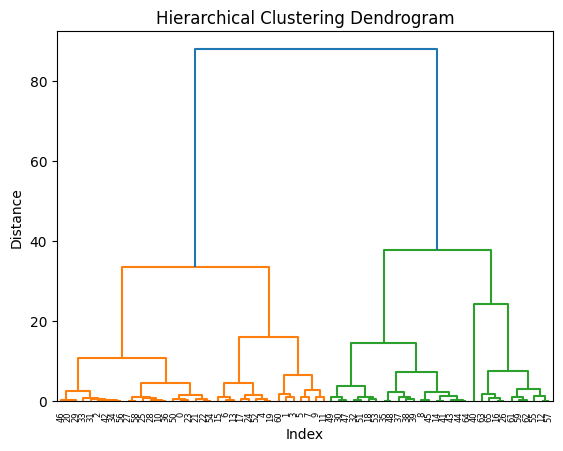

In [401]:
dendrogram(dataLinkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [402]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns
import os

In [403]:
df = pd.DataFrame(newData)
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = clustering.fit_predict(df)
newData['Cluster'] = clusters

In [404]:
dirPath = "D:\\projects\\DropWrap\\BackEnd\\Test\\ModelTesting\\outputData\\" + state

if  not os.path.exists(dirPath):
    os.mkdir(path=dirPath)

filePath = dirPath + "\\"  + cat + "\\" + var + ".csv"


if os.path.exists(filePath):
    os.remove(filePath)
    # newData.to_csv(filePath)
newData.to_csv(filePath)

OSError: Cannot save file into a non-existent directory: 'D:\projects\DropWrap\BackEnd\Test\ModelTesting\outputData\Gujarat\SC'

In [ ]:
newData

,snr_Overall,serialNumber,Cluster
0,8.28,1,0
5,1.21,2,0
10,17.98,3,0
15,13.47,4,0
20,12.87,5,0
25,19.12,6,2
30,11.54,7,0
35,3.51,8,0
40,19.89,9,2
45,23.23,10,2


In [ ]:
sns.scatterplot(data=newData, x='var', y='Cluster', hue='Cluster', palette='tab10')
plt.title('Agglomerative Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

ValueError: Could not interpret value `var` for `x`. An entry with this name does not appear in `data`.

In [ ]:
dendrogram(dataLinkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()